## Doğrusal Regresyon ve Kuzenleri

### Basit Doğrusal Regresyon

In [2]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df.iloc[:,1:len(df)]

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


#### Korelasyonlara baktığımızda televizyona fazla bir ilgi olduğunu görüyoruz ve televizyon satışı arttıkça satışların da artacağının habercisi

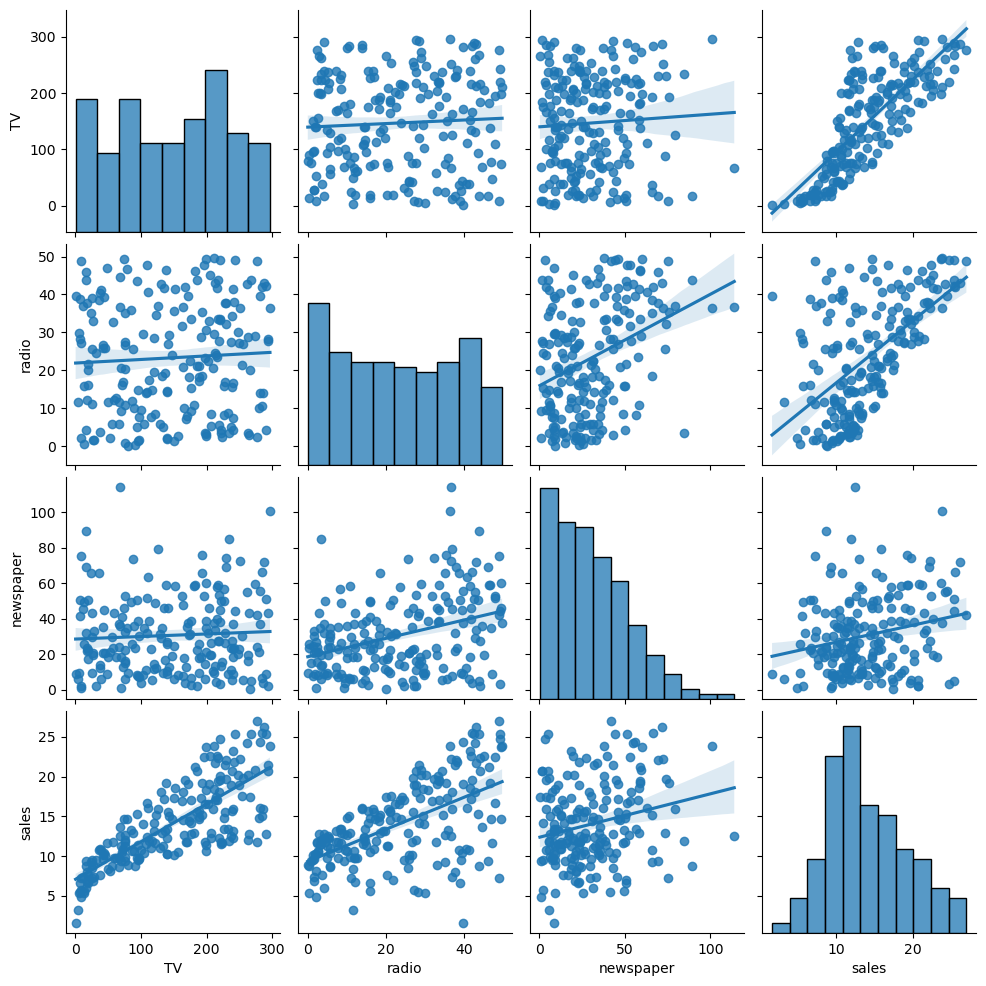

In [13]:
import seaborn as sns
sns.pairplot(df, kind = "reg");

### Korelasyon grafikleri incelendiğinde yukarıdaki corr argümanı çıktısında televizyon ile satışların şiddetli bir korelayona sahip olduğunu saptamıştık.
### Aynı zamanda newspaper'ın satışla aralarında düşük bir bağın olduğunu da görmüştük ve bunu grafikte de görebiliyoruz.

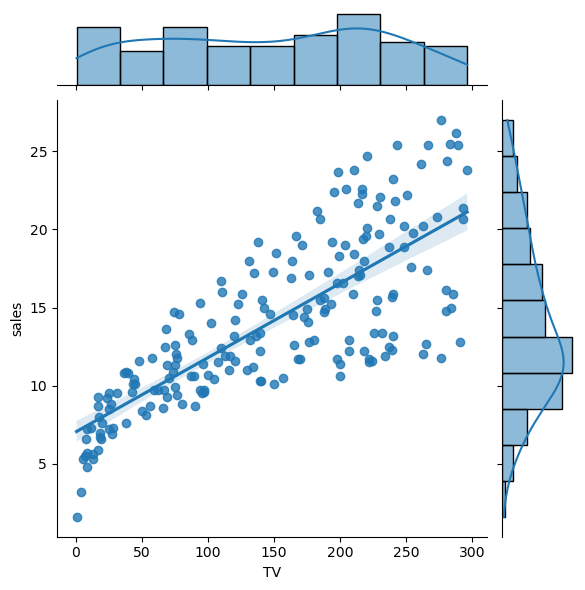

In [15]:
sns.jointplot(x = "TV",y = "sales", data =df, kind= "reg" );

#### Bu regresyon göz önüne alındığında normal bir dağılım söz konusu olduğunu saptayabiliyoruz.

## Statsmodels ile Modelleme 

In [18]:
import statsmodels.api as sm

In [19]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [20]:
X = sm.add_constant(X)

In [21]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [22]:
y = df["sales"]

In [23]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [25]:
#Aşağıdaki y bağımlı, X ise bağımsız değişkendir.

lineer_model = sm.OLS(y,X)

In [27]:
model = lineer_model.fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        17:48:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#farklı bir kullanım istersek;
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model.summary()
#aşağıda görüldüğü üzere aynı işlemi uzatmadan da bu şekilde çıkarabiliriz.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        18:45:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Statsmodels kütüphanesi içinde yer alan doğrusal regresyon modelinin çıktısında yer alan terimler ve açıklamaları aşağıdaki gibidir:

- **Dep. Variable / Bağımlı Değişken:** Modelde bağımlı değişken olarak kullanılan değişkenin ismi.
- **Model:** Kullanılan modelin adı ve parametreleri.
- **Method / Yöntem:** Modelin tahmin edilmesi için kullanılan yöntem.
- **No. Observations / Gözlemler:** Modelde yer alan toplam gözlem sayısı.
- **DF Residuals / Hata Serbestlik Derecesi:** Modeldeki serbestlik derecesi, yani tahmin edilen parametrelerin sayısının toplam gözlem sayısından çıkarılmasıyla elde edilir.
- **DF Model / Model Serbestlik Derecesi:** Modeldeki parametre sayısı.
- **Covariance Type / Kovaryans Türü:** Modelin kovaryans matrisinin hesaplanması için kullanılan yöntem.
- **R-squared / R Kare:** Modelin varyansını açıklama gücünü ifade eder. 1'e yakın değerler daha iyi bir uyum anlamına gelir.
- **Adj. R-squared / Düzeltilmiş R Kare:** R-kare değerinin düzeltilmiş halidir. Modeldeki parametre sayısı arttıkça R-kare değeri artar, ancak düzeltilmiş R-kare değeri düşer.
- **F-statistic / F İstatistiği:** Modelin anlamlılığını ölçen bir test istatistiğidir.
- **Prob (F-statistic) / F İstatistiği Sonucu:** F istatistiğine karşılık gelen p-value değeri. Bu değer 0.05'ten küçükse, model anlamlı kabul edilir.
- **Log-Likelihood / Log Olabilirlik:** Modelin olabilirlik fonksiyonunun logaritması.
- **AIC / AIC:** Akaike Bilgi Kriteri. Model seçimi için kullanılan bir kriterdir. Daha düşük bir AIC değeri daha iyi bir modelin seçildiği anlamına gelir.
- **BIC / BIC:** Bayes Bilgi Kriteri. AIC'ye benzer şekilde model seçimi için kullanılır.
- **coef / Katsayılar:** Modelin tahmin edilen katsayıları.
- **std err / Standart Hatalar:** Katsayıların standart hataları.
- **t / t İstatistiği:** Katsayıların anlamlılığını ölçen test istatistiği.
- **P>|t| / t İstatistiği Sonucu:** t istatistiğine karşılık gelen p-value değeri. Bu değer 0.05'ten küçükse, ilgili katsayı anlamlı kabul edilir.
- **[0.025 / alt sınır, 0.975 / üst sınır] / Güven Aralıkları:** Katsayıların güven aralıkları.
- **Omnibus / Omnibus Testi:** Modelde yer alan hata terimlerinin normal dağılma varsayımını test eden bir testtir.
- **Prob(Omnibus) / Omnibus Testi Sonucu:** Omnibus testine karşılık gelen p-value değeri.
- **Skew / Çarpıklık:** Modelde yer alan hata terimlerinin çarpıklık değeri.
- **Kurtosis / Basıklık:** Modelde yer alan hata terimlerinin basıklık değeri.
- **Durbin-Watson / Durbin-Watson Testi:** Modeldeki hatalar arasındaki otokorelasyonu test eden bir testtir. Değerler 0 ile 4 arasında olur, 2'ye yakın değerler otokorelasyon olmadığına işaret eder.
- **Cond. No. / Koşullu Sayı:** Modelin koşullu sayısı. Bu değer 30'dan büyükse, modelde çoklu doğrusal bağlantı problemi olabilir.

In [31]:
model.params

const    7.032594
TV       0.047537
dtype: float64

#### Const = ß0 değeridir. 
#### TV = ß1 değeridir.

In [33]:
model.summary().tables[1]
#tables[1] yukarıda model.summary() yazdığımızda çıkan tablolar indekslere ayrılmış durumdadır.
#Bu durumda biz 1.indekteki tabloyu ekrana yazdırdık.

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [35]:
#Confidence interval argümanı ile güven aralıklarını ekrana yazdırabiliriz. 
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


#### model.f_pvalue fonskiyonu ile P-Value değerini ekrana yazdırabiliriz.

In [40]:
print('P-Value: %.5f' % (model.f_pvalue))

P-Value Değeri : 0.00000


#### model.fvalue fonskiyonu ile F-Value değerini ekrana yazdırabiliriz.

In [41]:
print('F-Value: %.5f' % (model.fvalue))

F-Value: 312.14499


In [44]:
print('T-Value: %.5f' % (model.tvalues[0:1]))

T-Value: 15.36028


#### Modelin Anlamlılığına Erişmek İsteyip Modele İlişkin Hata Kareler Ortalamalarını Görmek İstersek;

In [52]:
#birim başına yaptığı hata çok korkunç seviyede yüksek buna aldanmayalım.
#Bu çalışmadaki amacımız temel makine öğrenim algoritmalarını öğrenmektir.
#Hata kareler ortalaması her birim başına yapacağı hata sayısıdır.
print('Hata Kareler Ortalaması: %.10f' % (model.mse_model))

Hata Kareler Ortalaması: 3314.6181668686


In [53]:
print('R Kare Değeri: %.10f' % (model.rsquared))

R Kare Değeri: 0.6118750509


In [55]:
print('Karekökü Alınmış R Kare Değeri (Düzeltilmiş R Kare Değeri) : %.5f'%(model.rsquared_adj))

Karekökü Alınmış R Kare Değeri (Düzeltilmiş R Kare Değeri) : 0.60991


### Şimdi ise Modelimizin Tahmin Ettiği Değerleri ve Gerçek Değerleri Ekrana Yazdırıp Karşılaştıralım

In [57]:
model.fittedvalues[0:5]
#aşağıdaki 0. ve 5.indekse kadar modelimizin tahmin ettiği değerler yer almaktadır.

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [59]:
y[0:5]
#aşağıdaki değerler bizim veri setimizideki gerçek değerlerdir.

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

### Şimdi ise modelimizin matematiksel işlemini ekrana yazdıralım.

In [62]:
print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


#### Yukarıdaki formül bizim TV reklamlarına ne kadar yatırım yaparsak Sales'a ne kadar etkisi olacağını görmemizi sağlar.

## Modelimizi Görselleştirilmiş Bir Grafiğe Dökmek İstersek;

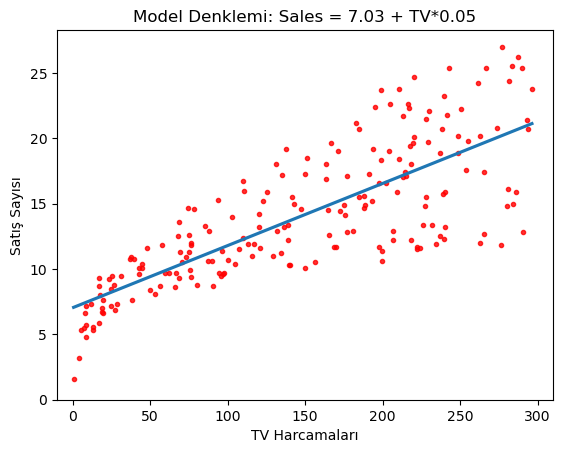

In [67]:
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"],df["sales"], ci = None, scatter_kws = {'color':'r','s':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

### Yukarıdaki Yaptığımız İşlemlerin Bir Kısmını Genelleyerek Sklearn Kütüphanesi Üzerinden Yapalım.

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
print('Modelin Katsayısı: %.5f' % (model.intercept_))

Modelin Katsayısı: 7.03259


In [71]:
print('Modelin ß1 Katsayısı: %.5f'%(model.coef_))

Modelin ß1 Katsayısı: 0.04754


In [74]:
print('R Kare Değeri: %.10f' % (model.score(X,y)))

R Kare Değeri: 0.6118750509


### Modelimizin Tahmin Değerlerini ve Gerçek Değerleri Karşılaştıralım.

In [75]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [76]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

### Bir İş Problemi Çözelim
#### 30, 56, 23, 100, 63, 12, 1, 36 birim TV harcaması olduğunda satışların tahmini değeri neler olur?

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
gelen_veriler = [[30],[56],[23],[100],[63],[12],[1],[36]]
ciktilar = model.predict(gelen_veriler)
print('Eğer 30 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: %.10f' % (ciktilar[0]))
print('Eğer 56 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: %.10f' % (ciktilar[1]))
print('Eğer 23 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: %.10f' % (ciktilar[2]))
print('Eğer 100 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: %.10f' % (ciktilar[3]))
print('Eğer 63 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: %.10f' % (ciktilar[4]))
print('Eğer 12 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: %.10f' % (ciktilar[5]))
print('Eğer 1 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: %.10f' % (ciktilar[6]))
print('Eğer 36 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: %.10f' % (ciktilar[7]))

Eğer 30 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: 8.4586927621
Eğer 56 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: 9.6946454134
Eğer 23 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: 8.1259362791
Eğer 100 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: 11.7862575924
Eğer 63 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: 10.0274018964
Eğer 12 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: 7.6030332343
Eğer 1 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: 7.0801301896
Eğer 36 birim TV Yatırımı Yapılırsa Satışlar Ekte Verildiği Kadar Artar: 8.7439126047


### Görüldüğü üzere Modelimiz sayesinde TV alanına yapılacak olan yatırımlar sonucunda elde edilecek artışları model tahmini olarak ekrana yazdırmış olduk.